# Fluidinámica computacional (Sesión 04)

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

# g)

**Resuelva este sistema de ecuaciones con los datos especificados. Considere el régimen estacionario.**

- Escriba, en forma matricial, el sistema de ecuaciones resultante para una discretización con 10 volúmenes de control,  $\Delta x = 0.5 \, [\mathrm{cm}]$.

- Presente en un grafico el perfil de temperatura obtenido, y la tasa de convergencia del metodo iterativo.

- Efectúe un balance de energía para evaluar la convergencia del mismo. Evalúe si para el caso de estudio, la discretización en 10 volúmenes de control es suficiente para garantizar la convergencia del balance de energía.

## Escritura de ecuaciones

Se considera la discretización de diez celdas presentada en la Figura e.02 (reproducida debajo):

<center>

<img src="figures/images/calculationDomainDiscretization_py.png" style="width:600px" title="Discretización 1D">

***Figura e.02. Esquema de discretización espacial en coordenadas cartesianas 1D.***

</center>

<details>
<summary><b>Consideraciones</b></summary>

<div class="alert alert-warning">

Al momento de escribir los coeficientes, en base al planteamiento del caso de estudio, se considera lo siguiente: 

- Conductividad térmica constante. En este caso no se requiere interpolar la conductividad térmica en las caras entre celdas:

$$
\lambda = \lambda_w = \lambda_e = 1 \, [\mathrm{W.m^{-1}.K^{-1}}]
$$

- Área de caras entre celdas constante:

$$
A_e = A_w = \Delta y \Delta z = 1 \, [\mathrm{m^2}]
$$

- Con la practica de discretización utilizada, en la que el tamaño de malla es constante y los nodos se localizan en el centroide de los volúmenes de control. Se tiene que la distancia entre centroides de los volúmenes de control es:

$$
\Delta x = (\delta x)_w = (\delta x)_e = 0.005\,[\mathrm{m}]
$$

- Para la discretización considerada con 10 volúmenes de control se tiene:

$$
V = \Delta x \Delta y \Delta z = 0.005 \, [\mathrm{m^3}]
$$

</div>

</details>

### Volúmenes de control internos

$$a_{P_{(C)}} T_{(C)} = a_{E_{(C)}} T_{(C+1)} + a_{W_{(C)}} T_{(C-1)} + b_{(C)}$$

donde: $(C) = 2, 3, \ldots, 8, 9$, es un numero utilizado para identificar cada volumen de control, tal como se muestra en la figura e-2.

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

$$a_{E_{(C)}} \, \left[\mathrm{W.K^{-1}}\right] = \frac{\lambda_e A_e}{(dx)_e} = 200 $$

$$a_{W_{(C)}} \, \left[\mathrm{W.K^{-1}}\right] = \frac{\lambda_w A_w}{(dx)_w} = 200 $$


$$a_{P_{(C)}}  \, \left[\mathrm{W.K^{-1}}\right] = a_E + a_W - S_P  V = 400$$

$$b \, [\mathrm{W}] = S_C  V = 0$$

$$S_C  \, \left[\mathrm{W.m^{-3}}\right] = 0$$

$$S_P  \, \left[\mathrm{W.m^{-3}.K^{-1}}\right] = 0$$

</div>

</details>

### Volúmen de control en la frontera izquierda (oeste)

$$a_{P_1} T_{1} = a_{E_1} T_{2} + b_1$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

$$a_{E_1} \, \left[\mathrm{W.K^{-1}}\right] = \frac{\lambda_e A_e}{(dx)_e} = 200 $$

$$a_{P_1} \, \left[\mathrm{W.K^{-1}}\right] = a_{E_1} +R_{eq} A_b - S_{P} V = 422.2222$$

$$b_1 \, [\mathrm{W}] = S_{C} V + R_{eq} A_b T_{\infty} = 65144.4444$$

$$R_{eq} A_b\, \left[\mathrm{W.K^{-1}}\right] = \frac{h_b \left( \lambda_b / (\delta x)_b \right)} {h_b + \left( \lambda_b / (\delta x)_b \right)} A_b = \frac{2000}{9}$$

$$T_{\infty} = 293.15 \, [\mathrm{K}]$$


$$S_C  \, \left[\mathrm{W.m^{-3}}\right] = 0$$

$$S_P  \, \left[\mathrm{W.m^{-3}.K^{-1}}\right] = 0$$

</div>

</details>

### Volúmen de control en la frontera derecha (este)

$$a_{P_{10}} T_{10} = a_{W_{10}} T_{9} + b_{10}$$

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

$$a_{W_{10}} \, \left[\mathrm{W.K^{-1}}\right] = \frac{\lambda_w A_w}{(dx)_w} = 200 $$

$$a_{P_{10}} \, \left[\mathrm{W.K^{-1}}\right] = a_{W_{10}} + R_{eq} A_b - S_{P} V = 422.2222$$

$$b_{10} \,[\mathrm{W}] = S_{C} V + R_{eq} A_b T_{\infty} = 74033.3333$$

$$R_{eq} A_b\, \left[\mathrm{W.K^{-1}}\right] = \frac{h_b \left( \lambda_b / (\delta x)_b \right)} {h_b + \left( \lambda_b / (\delta x)_b \right)} A_b = \frac{2000}{9}$$

$$T_{\infty} = 333.15 \, [\mathrm{K}]$$


$$S_C  \, \left[\mathrm{W.m^{-3}}\right] = 0$$

$$S_P  \, \left[\mathrm{W.m^{-3}.K^{-1}}\right] = 0$$

</div>

</details>

## Escritura del sistema de ecuaciones lineales

De forma general, el sistema de ecuaciones para el caso de interés se escribe:

$$
\begin{bmatrix} a_{P_1} & -a_{E_1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0   \\ 
-a_{W_2} & a_{P_2} & -a_{E_2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & -a_{W_3} & a_{P_3} & -a_{E_3} & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & -a_{W_4} & a_{P_4} & -a_{E_4} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -a_{W_5} & a_{P_5} & -a_{E_5} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -a_{W_6} & a_{P_6} & -a_{E_6} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -a_{W_7} & a_{P_7} & -a_{E_7} & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -a_{W_8} & a_{P_8} & -a_{E_8} & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -a_{W_9} & a_{P_9} & -a_{E_9} \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -a_{W_{10}} & a_{P_{10}} \end{bmatrix} 
\begin{bmatrix} T_1 \\ T_2 \\ T_3 \\ T_4 \\ T_5 \\ T_6 \\ T_7 \\ T_8 \\ T_9 \\ T_{10} \end{bmatrix}
= 
\begin{bmatrix} b_1 \\ b_2 \\ b_3 \\ b_4 \\ b_5 \\ b_6 \\ b_7 \\ b_8 \\ b_9 \\ b_{10} \end{bmatrix}
$$

Al sustituir los coeficientes con sus valores numéricos, el sistema se escribe:

$$
\begin{bmatrix} 422.2222 & -200 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0   \\ 
-200 & 400 & -200 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & -200 & 400 & -200 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & -200 & 400 & -200 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -200 & 400 & -200 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -200 & 400 & -200 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -200 & 400 & -200 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -200 & 400 & -200 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -200 & 400 & -200 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -200 & 422.2222 \end{bmatrix} 
\begin{bmatrix} T_1 \\ T_2 \\ T_3 \\ T_4 \\ T_5 \\ T_6 \\ T_7 \\ T_8 \\ T_9 \\ T_{10} \end{bmatrix} = 
\begin{bmatrix} 65144.4444 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 74033.3333 \end{bmatrix}
$$

## Aplicación numérica

### Importar librerias y funciones

Se importan las librerías `Plots` y `Printf` para construir gráficos con los resultados y hacer impresiones en pantalla de resultados con un formato customizado.

Se incluye el archivo `heatSteady.jl`, en el que se encuentran las definiciones de las funciones que se utilizarán para resolver el problema.

In [18]:
using Plots
using Printf
include("heatSteady.jl")

heatSteady.jl has been imported


### Parámetros para el cálculo

In [ ]:
# Parámetros físicos
X = 0.05    		# tamano del dominio [m]
λ = 1.0        		# conductividad termica del material [W/(m K)]
htc = 500.0    		# coeficiente de transferencia de calor (Cauchy) [W/(m2 K)]
Twest = CtoK(20.0)  # Temperatura lejos de la frontera oeste (Cauchy) [K]
Teast = CtoK(60.0) 	# Temperatura lejos de la frontera este (Cauchy) [K]
T0 = CtoK(500.0)    # Temperatura inicial para el calculo [K]
;

<details>
<summary><b>Especificación de temperaturas</b></summary>

<div class="alert alert-warning">

Nótese que dentro del bloque de código de arriba se lleva a cabo una operación de **pre-procesamiento**: 

- Se utiliza la función `CtoK()` para efectuar la transformación de unidades de temperatura de Celcius a Kelvin.

</div>
</details>

In [20]:
# Parámetros de discretización y numéricos
nCells = 10         # numero de celdas en el dominio discretizado
nIters = 20         # numero maximo de interaciones del metodo numerico
tol = 1e-15     # tolerancia de convergencia del metodo numerico
;

### Inicialización del dominio

In [21]:
Tinit = @. T0 * ones(Float64, nCells);

### Resolución del sistema de ecuaciones

In [22]:
# cálculo de perfil de temperatura en régimen estacionario
(T, error) = heatStationary(X, nCells, Tinit, λ, htc, Twest, Teast, nIters, tol)

# cálculo de temperaturas en las fronteras (Cauchy)
T_bw = tempBound(X, nCells, λ, htc, Twest, T[begin]) # frontera oeste
T_be = tempBound(X, nCells, λ, htc, Teast, T[end])   # frontera este
;

El problema ha convergido tras 2 iteraciones

### Balance de energía

In [23]:
ϕ_e, ϕ_w, Gen = stationaryHeatBalance(X, nCells, λ, T, T_bw, T_be);

In [24]:
println("BALANCE DE ENERGIA EN REGIMEN ESTACIONARIO:")
@printf("%13.6e || Flujo frontera oeste\n", ϕ_w)
@printf("%13.6e || Flujo frontera este\n", ϕ_e)
@printf("%13.6e || Generación\n", Gen)
println("-----------------------------------------")
@printf("%13.6e || Acumulación", ϕ_e + ϕ_w + Gen)

BALANCE DE ENERGIA EN REGIMEN ESTACIONARIO:
 7.407407e+02 || Flujo frontera oeste
-7.407407e+02 || Flujo frontera este
 0.000000e+00 || Generación
-----------------------------------------
 0.000000e+00 || Acumulación

### Representación gráfica de resultados

#### Perfil de temperatura

In [25]:
# Crear malla espacial para graficar
Δx = X/nCells
x = collect(LinRange(Δx/2, X-(Δx/2), nCells))
pushfirst!(x, 0.0)
push!(x, X)
;

In [26]:
# Temperatura en los volumenes de control, en Celcius
Tc = KtoC(T)
pushfirst!(Tc, KtoC(T_bw))
push!(Tc, KtoC(T_be))
;

<details>
<summary><b>Especificación de temperaturas</b></summary>

<div class="alert alert-warning">

Nótese que dentro de la celda de código arriba se lleva a cabo una operación de **post-procesamiento**: 

- Se utiliza la función `KtoC()` para efectuar la transformación de unidades de temperatura de Kelvin a Celcius.

</div>
</details>

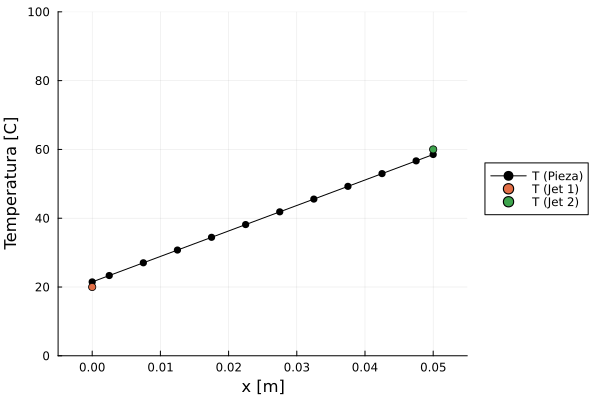

In [27]:
# Gráfico de perfil de temperatura
l1 = plot(x, Tc, marker=:circle, color = :black, label="T (Pieza)", leg=:outerright)
sW = scatter!([0.0], [KtoC(Twest)], label="T (Jet 1)")
sE = scatter!([X], [KtoC(Teast)], label="T (Jet 2)")	
xlims!(0-Δx, X+Δx)
ylims!(0, 100)
xlabel!("x [m]")
ylabel!("Temperatura [C]")

#### Convergencia de residuales

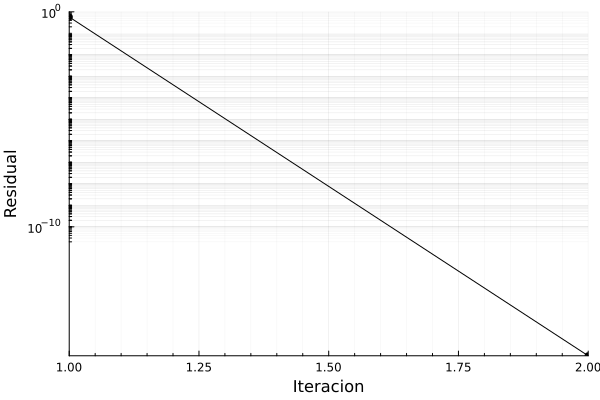

In [28]:
l2 = plot(error, marker=:circle, color = :black, label=false)
plot!(yscale=:log10, minorgrid=true)
xlims!(1, Inf)
ylims!(-Inf, 1)
xlabel!("Iteracion")
ylabel!("Residual")

## Comentarios finales

### Vista de las matrices construidas por el programa

El sistema de ecuaciones discretizadas se escribe en forma matricial como:

```math
\mathbf{A\,x = b}
```

La matriz de coeficientes, $\mathbf{A}$, que resulta para la discretización espacial elegida, y con las condiciones especificadas para la aplicación, se muestra debajo.

In [29]:
constructLHS_stat(X, nCells, Tinit, λ, htc)

10×10 Tridiagonal{Float64, Vector{Float64}}:
  422.222  -200.0      ⋅       ⋅   …      ⋅       ⋅       ⋅       ⋅ 
 -200.0     400.0  -200.0      ⋅          ⋅       ⋅       ⋅       ⋅ 
     ⋅     -200.0   400.0  -200.0         ⋅       ⋅       ⋅       ⋅ 
     ⋅         ⋅   -200.0   400.0         ⋅       ⋅       ⋅       ⋅ 
     ⋅         ⋅       ⋅   -200.0         ⋅       ⋅       ⋅       ⋅ 
     ⋅         ⋅       ⋅       ⋅   …  -200.0      ⋅       ⋅       ⋅ 
     ⋅         ⋅       ⋅       ⋅       400.0  -200.0      ⋅       ⋅ 
     ⋅         ⋅       ⋅       ⋅      -200.0   400.0  -200.0      ⋅ 
     ⋅         ⋅       ⋅       ⋅          ⋅   -200.0   400.0  -200.0
     ⋅         ⋅       ⋅       ⋅          ⋅       ⋅   -200.0   422.222

El vector $\mathbf{b}$, que resulta de la discretización espacial elegida, y con las condiciones especificadas para la aplicación, se muestra debajo.

In [30]:
A = constructLHS_stat(X, nCells, Tinit, λ, htc)
typeof(A)

Tridiagonal{Float64, Vector{Float64}}

In [31]:
constructRHS_stat(X, nCells, Tinit, λ, htc, Twest, Teast)

10-element Vector{Float64}:
 65144.44444444444
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
 74033.33333333333